In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr
from tabulate import tabulate

/Users/hebotao/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


# Read Data from .sav files

In [2]:
Abu_G4 = pd.read_spss("Abu_G4_2015.sav")
Australia_G4 = pd.read_spss("Australia_G4_2015.sav")
Bahrain_G4 = pd.read_spss("Bahrain_G4_2015.sav")
Chile_G4 = pd.read_spss("Chile_G4_2015.sav")
Dubai_G4 = pd.read_spss("Dubai_G4_2015.sav")
England_G4 = pd.read_spss("England_G4_2015.sav")
Georgia_G4 = pd.read_spss("Georgia_G4_2015.sav")
HongKong_G4 = pd.read_spss("HongKong_G4_2015.sav")
Hungary_G4 = pd.read_spss("Hungary_G4_2015.sav")
Iran_G4 = pd.read_spss("Iran_G4_2015.sav")
Ireland_G4 = pd.read_spss("Ireland_G4_2015.sav")
Italy_G4 = pd.read_spss("Italy_G4_2015.sav")
Japan_G4 = pd.read_spss("Japan_G4_2015.sav")
Kazakhstan_G4 = pd.read_spss("Kazakhstan_G4_2015.sav")
Korea_G4 = pd.read_spss("Korea_G4_2015.sav")
Kuwait_G4 = pd.read_spss("Kuwait_G4_2015.sav")
Lithuania_G4 = pd.read_spss("Lithuania_G4_2015.sav")
Morocco_G4 = pd.read_spss("Morocco_G4_2015.sav")
NewZealand_G4 = pd.read_spss("NewZealand_G4_2015.sav")
Oman_G4 = pd.read_spss("Oman_G4_2015.sav")
Ontario_G4 = pd.read_spss("Ontario_G4_2015.sav")
Quebec_G4 = pd.read_spss("Quebec_G4_2015.sav")
Russia_G4 = pd.read_spss("Russia_G4_2015.sav")
Singapore_G4 = pd.read_spss("Singapore_G4_2015.sav")
Sweden_G4 = pd.read_spss("Sweden_G4_2015.sav")
Taipei_G4 = pd.read_spss("Taipei_G4_2015.sav")
Turkey_G4 = pd.read_spss("Turkey_G4_2015.sav")
UAE_G4 = pd.read_spss("UAE_G4_2015.sav")
US_G4 = pd.read_spss("US_G4_2015.sav")

In [3]:
Abu_G8 = pd.read_spss("Abu_G8_2019.sav")
Australia_G8 = pd.read_spss("Australia_G8_2019.sav")
Bahrain_G8 = pd.read_spss("Bahrain_G8_2019.sav")
Chile_G8 = pd.read_spss("Chile_G8_2019.sav")
Dubai_G8 = pd.read_spss("Dubai_G8_2019.sav")
England_G8 = pd.read_spss("England_G8_2019.sav")
Georgia_G8 = pd.read_spss("Georgia_G8_2019.sav")
HongKong_G8 = pd.read_spss("HongKong_G8_2019.sav")
Hungary_G8 = pd.read_spss("Hungary_G8_2019.sav")
Iran_G8 = pd.read_spss("Iran_G8_2019.sav")
Ireland_G8 = pd.read_spss("Ireland_G8_2019.sav")
Italy_G8 = pd.read_spss("Italy_G8_2019.sav")
Japan_G8 = pd.read_spss("Japan_G8_2019.sav")
Kazakhstan_G8 = pd.read_spss("Kazakhstan_G8_2019.sav")
Korea_G8 = pd.read_spss("Korea_G8_2019.sav")
Kuwait_G8 = pd.read_spss("Kuwait_G8_2019.sav")
Lithuania_G8 = pd.read_spss("Lithuania_G8_2019.sav")
Morocco_G8 = pd.read_spss("Morocco_G8_2019.sav")
NewZealand_G8 = pd.read_spss("NewZealand_G8_2019.sav")
Oman_G8 = pd.read_spss("Oman_G8_2019.sav")
Ontario_G8 = pd.read_spss("Ontario_G8_2019.sav")
Quebec_G8 = pd.read_spss("Quebec_G8_2019.sav")
Russia_G8 = pd.read_spss("Russia_G8_2019.sav")
Singapore_G8 = pd.read_spss("Singapore_G8_2019.sav")
Sweden_G8 = pd.read_spss("Sweden_G8_2019.sav")
Taipei_G8 = pd.read_spss("Taipei_G8_2019.sav")
Turkey_G8 = pd.read_spss("Turkey_G8_2019.sav")
UAE_G8 = pd.read_spss("UAE_G8_2019.sav")
US_G8 = pd.read_spss("US_G8_2019.sav")

# The corresponding variable names between G4 and G8

In [48]:
variable_list_G4 = ['IDCNTRY','ASBG04','ASBG01','ASBG03','ASBG05A','ASBG05C','ASBG05D','ASBG05E',
                    'ASBG12B','ASBG12C','ASBG12D','ASBG12E','ASBG12G','ASBG12H',
                    'ASBG11A','ASBG11B','ASBG11C','ASBG11E','ASBG11F',
                    'ASBM01A','ASBM01B','ASBM01C','ASBM01D','ASBM01E','ASBM01F','ASBM01G','ASBM01H','ASBM01I',
                    'ASBM02A','ASBM02B','ASBM02E','ASBM02F','ASBM02H',
                    'ASBM03A','ASBM03B','ASBM03C','ASBM03D','ASBM03E','ASBM03F','ASBM03G','ASBM03H','ASBM03I',
                    'IDGRADE','ASMMAT01','ASMMAT02','ASMMAT03','ASMMAT04','ASMMAT05']

In [49]:
variable_list_G8 = ['IDCNTRY','BSBG04','BSBG01','BSBG03','BSBG05A','BSBG05B','BSBG05C','BSBG05D',
                    'BSBG14M','BSBG14B','BSBG14F','BSBG14L','BSBG14J','BSBG14K',
                    'BSBG13A','BSBG13B','BSBG13C','BSBG13D','BSBG13E',
                    'BSBM16A','BSBM16B','BSBM16C','BSBM16D','BSBM16E','BSBM16F','BSBM16G','BSBM16H','BSBM16I',
                    'BSBM17A','BSBM17B','BSBM17C','BSBM17D','BSBM17E',
                    'BSBM19A','BSBM19B','BSBM19C','BSBM19D','BSBM19E','BSBM19F','BSBM19G','BSBM19H','BSBM19I',
                    'IDGRADE','BSMMAT01','BSMMAT02','BSMMAT03','BSMMAT04','BSMMAT05']

Only select the necessary variables

In [50]:
def G4_df(Country):
    df = Country[variable_list_G4]
    return pd.DataFrame(df)

In [51]:
def G8_df(Country):
    df = Country[variable_list_G8]
    return pd.DataFrame(df)

In [52]:
Countrylist_G4 = [Abu_G4,Australia_G4,Bahrain_G4,Chile_G4,Dubai_G4,England_G4,Georgia_G4,HongKong_G4,
                  Hungary_G4,Iran_G4,Ireland_G4,Italy_G4,Japan_G4,Kazakhstan_G4,Korea_G4,Kuwait_G4,
                  Lithuania_G4,Morocco_G4,NewZealand_G4,Oman_G4,Ontario_G4,Quebec_G4,Russia_G4,
                  Singapore_G4,Sweden_G4,Taipei_G4,Turkey_G4,UAE_G4,US_G4]
Countrylist_G8 = [Abu_G8,Australia_G8,Bahrain_G8,Chile_G8,Dubai_G8,England_G8,Georgia_G8,HongKong_G8,
                  Hungary_G8,Iran_G8,Ireland_G8,Italy_G8,Japan_G8,Kazakhstan_G8,Korea_G8,Kuwait_G8,
                  Lithuania_G8,Morocco_G8,NewZealand_G8,Oman_G8,Ontario_G8,Quebec_G8,Russia_G8,
                  Singapore_G8,Sweden_G8,Taipei_G8,Turkey_G8,UAE_G8,US_G8]

29 G4 countries background question data was merged into a new dataset called BQ_G4.

In [53]:
BQ_G4 = pd.concat([G4_df(Abu_G4),G4_df(Australia_G4),G4_df(Bahrain_G4),G4_df(Chile_G4),G4_df(Dubai_G4),
                   G4_df(England_G4),G4_df(Georgia_G4),G4_df(HongKong_G4),G4_df(Hungary_G4),G4_df(Iran_G4),
                   G4_df(Ireland_G4),G4_df(Italy_G4),G4_df(Japan_G4),G4_df(Kazakhstan_G4),G4_df(Korea_G4),
                   G4_df(Kuwait_G4),G4_df(Lithuania_G4),G4_df(Morocco_G4),G4_df(NewZealand_G4),G4_df(Oman_G4),
                   G4_df(Ontario_G4),G4_df(Quebec_G4),G4_df(Russia_G4),G4_df(Singapore_G4),G4_df(Sweden_G4),
                   G4_df(Taipei_G4),G4_df(Turkey_G4),G4_df(UAE_G4),G4_df(US_G4)])
BQ_G4 = pd.DataFrame(BQ_G4)

29 G8 countries background question data was merged into a new dataset called BQ_G8.

In [54]:
BQ_G8 = pd.concat([G8_df(Abu_G8),G8_df(Australia_G8),G8_df(Bahrain_G8),G8_df(Chile_G8),G8_df(Dubai_G8),
                   G8_df(England_G8),G8_df(Georgia_G8),G8_df(HongKong_G8),G8_df(Hungary_G8),G8_df(Iran_G8),
                   G8_df(Ireland_G8),G8_df(Italy_G8),G8_df(Japan_G8),G8_df(Kazakhstan_G8),G8_df(Korea_G8),
                   G8_df(Kuwait_G8),G8_df(Lithuania_G8),G8_df(Morocco_G8),G8_df(NewZealand_G8),G8_df(Oman_G8),
                   G8_df(Ontario_G8),G8_df(Quebec_G8),G8_df(Russia_G8),G8_df(Singapore_G8),G8_df(Sweden_G8),
                   G8_df(Taipei_G8),G8_df(Turkey_G8),G8_df(UAE_G8),G8_df(US_G8)])
BQ_G8 = pd.DataFrame(BQ_G8)
BQ_G8.columns = variable_list_G4
BQ_G8['ASBG04'] = BQ_G8['ASBG04'].cat.rename_categories({'None or very few (0–10 books)':'0–10 books',
                                                         'Enough to fill two bookcases (101–200 books)':'101–200 books',
                                                         'Enough to fill one shelf (11–25 books)':'11–25 books', 
                                                         'Enough to fill one bookcase (26–100 books)':'26–100 books', 
                                                         'Enough to fill three or more bookcases (more than 200)':'More than 200'})


G4 and G8 dataset for all countries are merged into a big dataset called BQdata.

In [55]:
BQData = BQ_G4.append(BQ_G8)

For grade variable, all the 5th grade will be considered as 4th grade and all the 9th grade will be considered as 8th grade.

In [56]:
BQData['IDGRADE'] = BQData['IDGRADE'].replace('Grade 5','Grade 4').replace('Grade 9','Grade 8')

# One-Hot Encoding for categorical variables

In [57]:
def One_Hot_Encoder(df,BQ):
    df[BQ] = df[BQ].astype('object')
    df[BQ] = df[BQ].replace(np.nan,'0')
    values = array(df[BQ])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    values_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return pd.DataFrame(data=values_onehot_encoded, columns = onehot_encoder.categories_)

I keep all the columns for the One-Hot Encoded country variable, but drop the column for missing data (`NaN`) category for each One-Hot Encoded background variable. Since there is no missing data for `IDGRADE` variable, I will not drop any column of this variable.

In [58]:
X = One_Hot_Encoder(BQData,'IDCNTRY')
for item in variable_list_G4[1:42]:
    X = pd.concat([X, One_Hot_Encoder(BQData,item)], axis=1)
X = pd.concat([X, One_Hot_Encoder(BQData,'IDGRADE')], axis=1)

/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [59]:
BQData['MathMean'] = (BQData['ASMMAT01'] + BQData['ASMMAT02'] + BQData['ASMMAT03'] +
                      BQData['ASMMAT04'] + BQData['ASMMAT05']) / 5000

In [60]:
X = pd.concat([X, pd.DataFrame(BQData['MathMean'].reset_index()['MathMean'])], axis=1)
X = array(X)

Split into input and output datasets.

In [66]:
Input_data = X[:,0:227]
Output_data = X[:,227]

# Define the Keras Model

For the first model, I used `relu` as the activation function for the last layer. For the second model, I used `sigmoid` as the activation function for the last layer.

In [80]:
model1 = Sequential()
model1.add(Dense(32, input_dim=len(Input_data[0]), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='relu'))

In [81]:
model2 = Sequential()
model2.add(Dense(32, input_dim=len(Input_data[0]), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the Keras Model

In [82]:
model1.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error','mean_squared_error'])

In [83]:
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error','mean_squared_error'])

# Fit Keras Model 

In [84]:
training1 = model1.fit(Input_data, Output_data, epochs=350, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/350
2046/2046 [==============================] - 5s 2ms/step - loss: 0.0146 - mean_absolute_error: 0.0955 - mean_squared_error: 0.0146 - val_loss: 0.0115 - val_mean_absolute_error: 0.0862 - val_mean_squared_error: 0.0115
Epoch 2/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0100 - mean_absolute_error: 0.0804 - mean_squared_error: 0.0100 - val_loss: 0.0102 - val_mean_absolute_error: 0.0813 - val_mean_squared_error: 0.0102
Epoch 3/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0091 - mean_absolute_error: 0.0766 - mean_squared_error: 0.0091 - val_loss: 0.0096 - val_mean_absolute_error: 0.0787 - val_mean_squared_error: 0.0096
Epoch 4/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0086 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0086 - val_loss: 0.0092 - val_mean_absolute_error: 0.0771 - val_mean_squared_error: 0.0092
Epoch 5/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0082 

Epoch 37/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0593 - mean_squared_error: 0.0056 - val_loss: 0.0066 - val_mean_absolute_error: 0.0651 - val_mean_squared_error: 0.0066
Epoch 38/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0591 - mean_squared_error: 0.0056 - val_loss: 0.0066 - val_mean_absolute_error: 0.0651 - val_mean_squared_error: 0.0066
Epoch 39/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0589 - mean_squared_error: 0.0055 - val_loss: 0.0065 - val_mean_absolute_error: 0.0646 - val_mean_squared_error: 0.0065
Epoch 40/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0587 - mean_squared_error: 0.0055 - val_loss: 0.0066 - val_mean_absolute_error: 0.0648 - val_mean_squared_error: 0.0066
Epoch 41/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.

Epoch 73/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0551 - mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_absolute_error: 0.0610 - val_mean_squared_error: 0.0058
Epoch 74/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0550 - mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_absolute_error: 0.0609 - val_mean_squared_error: 0.0058
Epoch 75/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0550 - mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_absolute_error: 0.0609 - val_mean_squared_error: 0.0058
Epoch 76/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0549 - mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_absolute_error: 0.0608 - val_mean_squared_error: 0.0058
Epoch 77/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.

2046/2046 [==============================] - 4s 2ms/step - loss: 0.0047 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0047 - val_loss: 0.0056 - val_mean_absolute_error: 0.0595 - val_mean_squared_error: 0.0056
Epoch 144/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0047 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0047 - val_loss: 0.0055 - val_mean_absolute_error: 0.0594 - val_mean_squared_error: 0.0055
Epoch 145/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0047 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0047 - val_loss: 0.0055 - val_mean_absolute_error: 0.0595 - val_mean_squared_error: 0.0055
Epoch 146/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0047 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0047 - val_loss: 0.0055 - val_mean_absolute_error: 0.0595 - val_mean_squared_error: 0.0055
Epoch 147/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0047 - me

2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0534 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0591 - val_mean_squared_error: 0.0055
Epoch 214/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0534 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0593 - val_mean_squared_error: 0.0055
Epoch 215/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0534 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0590 - val_mean_squared_error: 0.0055
Epoch 216/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0534 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0591 - val_mean_squared_error: 0.0055
Epoch 217/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - me

2046/2046 [==============================] - 5s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0586 - val_mean_squared_error: 0.0054
Epoch 284/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0586 - val_mean_squared_error: 0.0054
Epoch 285/350
2046/2046 [==============================] - 6s 3ms/step - loss: 0.0045 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0586 - val_mean_squared_error: 0.0054
Epoch 286/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0530 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0586 - val_mean_squared_error: 0.0054
Epoch 287/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - me

In [85]:
training2 = model2.fit(Input_data, Output_data, epochs=350, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/350
2046/2046 [==============================] - 5s 2ms/step - loss: 0.0106 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0106 - val_loss: 0.0106 - val_mean_absolute_error: 0.0834 - val_mean_squared_error: 0.0106
Epoch 2/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0097 - mean_absolute_error: 0.0799 - mean_squared_error: 0.0097 - val_loss: 0.0100 - val_mean_absolute_error: 0.0809 - val_mean_squared_error: 0.0100
Epoch 3/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0091 - mean_absolute_error: 0.0772 - mean_squared_error: 0.0091 - val_loss: 0.0095 - val_mean_absolute_error: 0.0788 - val_mean_squared_error: 0.0095
Epoch 4/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0087 - mean_absolute_error: 0.0750 - mean_squared_error: 0.0087 - val_loss: 0.0092 - val_mean_absolute_error: 0.0772 - val_mean_squared_error: 0.0092
Epoch 5/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0083 

Epoch 37/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0576 - mean_squared_error: 0.0053 - val_loss: 0.0065 - val_mean_absolute_error: 0.0645 - val_mean_squared_error: 0.0065
Epoch 38/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0574 - mean_squared_error: 0.0053 - val_loss: 0.0065 - val_mean_absolute_error: 0.0645 - val_mean_squared_error: 0.0065 - loss: 0.0053 - mean_absolute_error: 0.0 - ETA: 1s - l
Epoch 39/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0572 - mean_squared_error: 0.0052 - val_loss: 0.0064 - val_mean_absolute_error: 0.0641 - val_mean_squared_error: 0.0064
Epoch 40/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0570 - mean_squared_error: 0.0052 - val_loss: 0.0064 - val_mean_absolute_error: 0.0641 - val_mean_squared_error: 0.0064
Epoch 41/350
2046/2046 [

Epoch 108/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0537 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0594 - val_mean_squared_error: 0.0055
Epoch 109/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0536 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0594 - val_mean_squared_error: 0.0055
Epoch 110/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0536 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0594 - val_mean_squared_error: 0.0055
Epoch 111/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0536 - mean_squared_error: 0.0046 - val_loss: 0.0055 - val_mean_absolute_error: 0.0594 - val_mean_squared_error: 0.0055
Epoch 112/350
2046/2046 [==============================] - 4s 2ms/step - los

2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0532 - mean_squared_error: 0.0046 - val_loss: 0.0054 - val_mean_absolute_error: 0.0588 - val_mean_squared_error: 0.0054
Epoch 179/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0046 - val_loss: 0.0054 - val_mean_absolute_error: 0.0588 - val_mean_squared_error: 0.0054
Epoch 180/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0046 - val_loss: 0.0054 - val_mean_absolute_error: 0.0588 - val_mean_squared_error: 0.0054
Epoch 181/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0046 - val_loss: 0.0054 - val_mean_absolute_error: 0.0588 - val_mean_squared_error: 0.0054
Epoch 182/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0046 - me

2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0528 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0585 - val_mean_squared_error: 0.0054
Epoch 249/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0528 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0585 - val_mean_squared_error: 0.0054
Epoch 250/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0528 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0585 - val_mean_squared_error: 0.0054
Epoch 251/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0528 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_absolute_error: 0.0585 - val_mean_squared_error: 0.0054
Epoch 252/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - me

2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0526 - mean_squared_error: 0.0045 - val_loss: 0.0053 - val_mean_absolute_error: 0.0582 - val_mean_squared_error: 0.0053
Epoch 319/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0526 - mean_squared_error: 0.0045 - val_loss: 0.0053 - val_mean_absolute_error: 0.0583 - val_mean_squared_error: 0.0053
Epoch 320/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0526 - mean_squared_error: 0.0045 - val_loss: 0.0053 - val_mean_absolute_error: 0.0582 - val_mean_squared_error: 0.0053
Epoch 321/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0526 - mean_squared_error: 0.0045 - val_loss: 0.0053 - val_mean_absolute_error: 0.0582 - val_mean_squared_error: 0.0053
Epoch 322/350
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0045 - me

# Visualize the Learning Curves for Model Training to Diagnose the Performance

### Model 1 (using relu for the last layer)

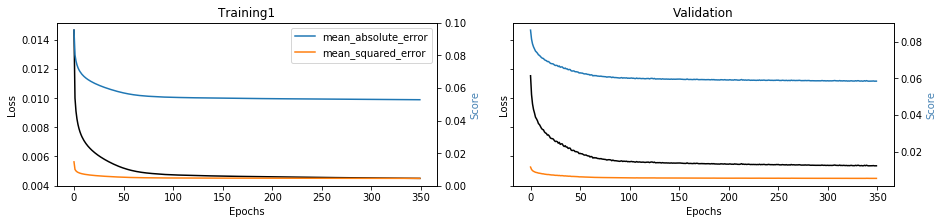

In [86]:
metrics = [k for k in training1.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
## training    
ax[0].set(title="Training1")    
ax11 = ax[0].twinx()    
ax[0].plot(training1.history['loss'], color='black')    
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training1.history[metric], label=metric)    
ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()

ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training1.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training1.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

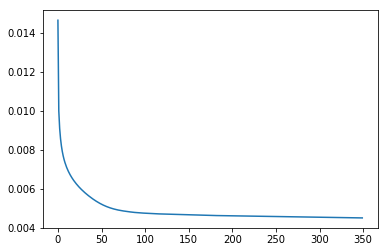

In [87]:
plt.plot(training1.history['loss'])

### Model 2 (using sigmoid for the last layer)

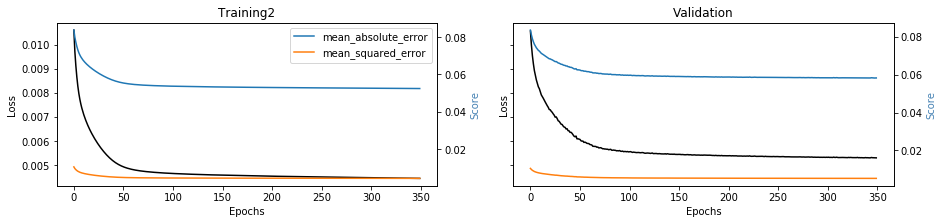

In [88]:
metrics = [k for k in training2.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
## training    
ax[0].set(title="Training2")    
ax11 = ax[0].twinx()    
ax[0].plot(training2.history['loss'], color='black')    
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics: 
    ax11.plot(training2.history[metric], label=metric)    
ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()

ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training2.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training2.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

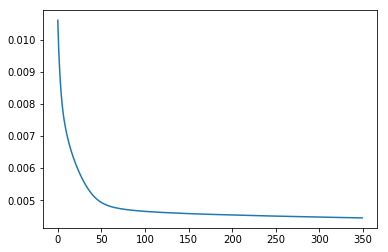

In [89]:
plt.plot(training2.history['loss'])

## How accurate are these two models in predicting country-level math scores?

In [90]:
s = 0
Country_index = [s]
for item in Countrylist_G4:
    s += len(item)
    Country_index.append(s)
for item in Countrylist_G8:
    s += len(item)
    Country_index.append(s)

In [91]:
Countryname_G4 = ['Abu_G4','Australia_G4','Bahrain_G4','Chile_G4','Dubai_G4','England_G4','Georgia_G4','HongKong_G4',
                  'Hungary_G4','Iran_G4','Ireland_G4','Italy_G4','Japan_G4','Kazakhstan_G4','Korea_G4','Kuwait_G4',
                  'Lithuania_G4','Morocco_G4','NewZealand_G4','Oman_G4','Ontario_G4','Quebec_G4','Russia_G4',
                  'Singapore_G4','Sweden_G4','Taipei_G4','Turkey_G4','UAE_G4','US_G4']
Countryname_G8 = ['Abu_G8','Australia_G8','Bahrain_G8','Chile_G8','Dubai_G8','England_G8','Georgia_G8','HongKong_G8',
                  'Hungary_G8','Iran_G8','Ireland_G8','Italy_G8','Japan_G8','Kazakhstan_G8','Korea_G8','Kuwait_G8',
                  'Lithuania_G8','Morocco_G8','NewZealand_G8','Oman_G8','Ontario_G8','Quebec_G8','Russia_G8',
                  'Singapore_G8','Sweden_G8','Taipei_G8','Turkey_G8','UAE_G8','US_G8']
Countryname = Countryname_G4 + Countryname_G8

In [92]:
table = [['Country and Grade','model 1 prediction','model 2 prediction','actual value','model 1 bias','model 2 bias']]
for i in range(len(Country_index)-1):
    model1_prediction = np.mean(model1.predict(Input_data[Country_index[i]:Country_index[i+1]])*1000)
    model2_prediction = np.mean(model2.predict(Input_data[Country_index[i]:Country_index[i+1]])*1000)
    actual_value = np.mean(Output_data[Country_index[i]:Country_index[i+1]]*1000)
    bias1 = actual_value - model1_prediction
    bias2 = actual_value - model2_prediction
    table.append([Countryname[i],model1_prediction,model2_prediction,actual_value,bias1,bias2])

In [93]:
print(tabulate(table, headers='firstrow'))

Country and Grade      model 1 prediction    model 2 prediction    actual value    model 1 bias    model 2 bias
-------------------  --------------------  --------------------  --------------  --------------  --------------
Abu_G4                            419.811               417.356         407.062     -12.7494         -10.2937
Australia_G4                      520.165               519.307         512.268      -7.89647         -7.03899
Bahrain_G4                        458.349               455.124         451.631      -6.7179          -3.49262
Chile_G4                          460.549               460.159         469.608       9.05864          9.44841
Dubai_G4                          508.418               506.819         502.305      -6.11282         -4.51443
England_G4                        538.784               540.083         546           7.21614          5.91749
Georgia_G4                        461.242               462.065         463.421       2.17973          1.35582


# Make Predictions

## Convert G4 input to G8 input for each country

We can switch the grade indicators from G4 to G8 by swaping the last two columns of the Input_Data. 

In [94]:
Input_data[:, [-1,-2]] = Input_data[:, [-2,-1]]

In [95]:
table = [['Country and Grade','model 1 prediction','model 2 prediction','actual value','model 1 bias','model 2 bias']]
for i in range(29):
    model1_prediction = np.mean(model1.predict(Input_data[Country_index[i]:Country_index[i+1]])*1000)
    model2_prediction = np.mean(model2.predict(Input_data[Country_index[i]:Country_index[i+1]])*1000)
    actual_value = np.mean(Output_data[Country_index[i+29]:Country_index[i+30]]*1000)
    bias1 = actual_value - model1_prediction
    bias2 = actual_value - model2_prediction
    table.append([Countryname[i+29],model1_prediction,model2_prediction,actual_value,bias1,bias2])

In [96]:
print(tabulate(table, headers='firstrow'))

Country and Grade      model 1 prediction    model 2 prediction    actual value    model 1 bias    model 2 bias
-------------------  --------------------  --------------------  --------------  --------------  --------------
Abu_G8                            424.669               425.466         436.162       11.4936          10.696
Australia_G8                      524.319               523.99          529.845        5.52607          5.85529
Bahrain_G8                        460.501               466.002         481.375       20.8743          15.3729
Chile_G8                          459.678               461.748         448.424      -11.2536         -13.3238
Dubai_G8                          513.97                514.741         527.445       13.4748          12.7037
England_G8                        541.049               540.316         516.268      -24.7811         -24.048
Georgia_G8                        466.539               468.528         462.045       -4.49376         -6.48216